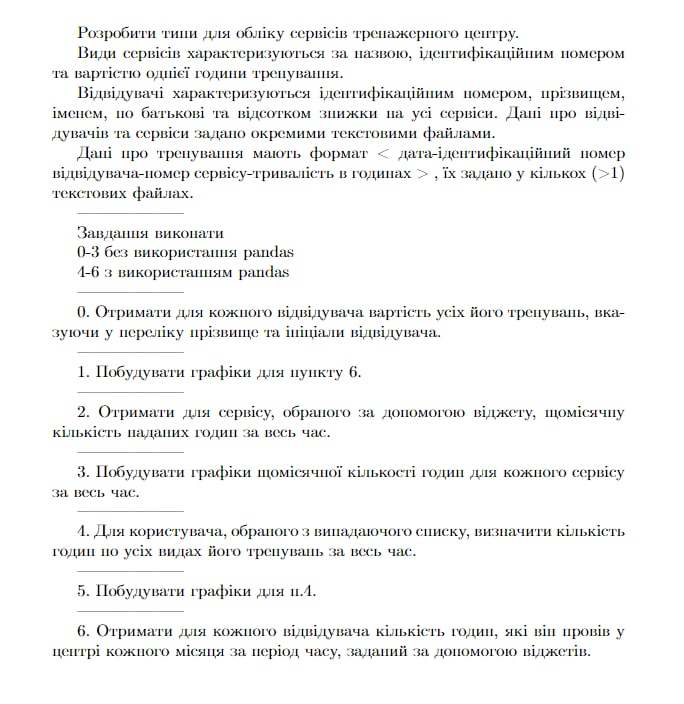

In [658]:
from IPython.display import Image
Image(filename='2021-01-02 18.50.18.jpg')

In [659]:
from datetime import datetime

class Validation:
    """Class for Validation representation."""

    @staticmethod
    def validateStr(func):
        def validateStrWrapper(w, value):
            if not(isinstance(value, str)):
                raise TypeError('must be an str')
            return func(w, value)
        return validateStrWrapper

    @staticmethod
    def validateFloat(func):
        def validateFloatWrapper(w, value):
            if not(isinstance(value, float)) and not(isinstance(value, int)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            return func(w, value)
        return validateFloatWrapper

    @staticmethod
    def validateInt(func):
        def validateIntWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            return func(w, value)
        return validateIntWrapper

    @staticmethod
    def validateSize(func):
        def validateSizeWrapper(w, value):
            if not(isinstance(value, int)) and not(isinstance(value, float)):
                try:
                    value = float(value)
                except TypeError:
                    raise TypeError('must be an float')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateSizeWrapper

    @staticmethod
    def validateAmount(func):
        def validateAmountWrapper(w, value):
            if not(isinstance(value, int)):
                try:
                    value = int(value)
                except TypeError:
                    raise TypeError('must be an int')
            if value < 0:
                raise ValueError("mast be positive")
            return func(w, value)
        return validateAmountWrapper

    @staticmethod
    def validateDate(func):
        def validateDateWrapper(w, date):
            date = datetime.strptime(date, '%Y-%m-%d')
            return func(w, date)
        return validateDateWrapper

    @staticmethod
    def validateCard(func):
        def validateCardWrapper(w, value):
            if not value.isdigit():
                raise ValueError("mast contain only digits")
            return func(w, value)
        return validateCardWrapper

    @staticmethod
    def validateBool(func):
        def validateBoolWrapper(w, value):
            bools = ['yes', 'no', 'Yes', 'No', '0', '1', 0, 1, True, False, 'True', 'False']
            if value not in bools:
                raise ValueError("mast be boolean")
            return func(w, value)
        return validateBoolWrapper

In [660]:
class Services:
    def __init__(self, s_id, s_price, s_name):
        self.s_id = s_id
        self.s_price = s_price
        self.s_name = s_name

    @property
    def s_id(self):
        return self._s_id
    
    @s_id.setter
    @Validation.validateAmount
    def s_id(self, val):
        self._s_id = val
    
    @property
    def s_price(self):
        return self._s_price
    
    @s_price.setter
    @Validation.validateSize
    def s_price(self, val):
        self._s_price = val

    @property
    def s_name(self):
        return self._s_name

    @s_name.setter
    @Validation.validateStr
    def s_name(self, val):
        self._s_name = val

    def __str__(self):
        return f'id = {self.s_id}, price = {self.s_price}, name = {self.s_name}'

    def __repr__(self):
        return f's_id={self.s_id}, s_price={self.s_price}, s_name={self.s_name}'

In [661]:
class Visitor:
    def __init__(self, v_id, v_last_name, v_name, v_father, v_discount):
        self.v_id = v_id
        self.v_last_name = v_last_name
        self.v_name = v_name
        self.v_father = v_father
        self.v_discount = v_discount

    @property
    def v_id(self):
        return self._v_id
    
    @v_id.setter
    @Validation.validateAmount
    def v_id(self, val):
        self._v_id = val

    @property
    def v_last_name(self):
        return self._v_last_name

    @v_last_name.setter
    @Validation.validateStr
    def v_last_name(self, val):
        self._v_last_name = val

    @property
    def v_name(self):
        return self._v_name

    @v_name.setter
    @Validation.validateStr
    def v_name(self, val):
        self._v_name = val

    @property
    def v_father(self):
        return self._v_father

    @v_father.setter
    @Validation.validateStr
    def v_father(self, val):
        self._v_father = val

    @property
    def v_discount(self):
        return self._v_discount
    
    @v_discount.setter
    @Validation.validateAmount
    def v_discount(self, val):
        self._v_discount = val

    def full_name(self):
        return f'{self.v_last_name} {self.v_name[0]}. {self.v_father[0]}.'

    def __str__(self):
        return f'id = {self.v_id}, last name = {self.v_last_name}, name = {self.v_name}, father = {self.v_father}, discount = {self.v_discount}'

    def __repr__(self):
        return f'v_id={self.v_id}, v_last_name={self.v_last_name}, v_name={self.v_name}, v_father={self.v_father}, v_discount={self.v_discount}'

In [662]:
class Training:
    def __init__(self, t_date, v_id, s_id, t_hours):
        self.t_date = t_date
        self.v_id = v_id
        self.s_id = s_id
        self.t_hours = t_hours

    @property
    def t_date(self):
        return self._t_date

    @t_date.setter
    @Validation.validateDate
    def t_date(self, val):
        self._t_date = val

    @property
    def v_id(self):
        return self._v_id
    
    @v_id.setter
    @Validation.validateAmount
    def v_id(self, val):
        self._v_id = val

    @property
    def s_id(self):
        return self._s_id
    
    @s_id.setter
    @Validation.validateAmount
    def s_id(self, val):
        self._s_id = val
    
    @property
    def t_hours(self):
        return self._t_hours
    
    @t_hours.setter
    @Validation.validateSize
    def t_hours(self, val):
        self._t_hours = val

    def __str__(self):
        return f'date = {self.t_date}, vis id = {self.v_id}, ser id = {self.s_id}, hours = {self.t_hours}'

    def __repr__(self):
        return f't_date={self.t_date}, v_id={self.v_id}, s_id={self.s_id}, t_hours={self.t_hours}'

In [663]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import csv
from matplotlib import pyplot as plt

## Without Pandas 

In [664]:
def read_csv_file(file_name, t, objects):  
    try:
        with open(file_name, 'r') as v:
            r = csv.reader(v)
            next(r)
            for row in r:
                try:
                    objects.append(t(*row))
                except Exception as e:
                    print(f'{file_name}:\nline - {len(objects)}: {e}')
                    continue
    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(e)

In [665]:
visitors = []
services = []
trainings = []
read_csv_file("visitors.csv", Visitor, visitors)
read_csv_file("services.csv", Services, services)
read_csv_file("trainings1.csv", Training, trainings)
read_csv_file("trainings2.csv", Training, trainings)

visitors, services, trainings

([v_id=1, v_last_name=Bins, v_name=Manuela, v_father=Yvette, v_discount=71,
  v_id=2, v_last_name=Huels, v_name=Matilda, v_father=Lauretta, v_discount=87,
  v_id=3, v_last_name=Yost, v_name=Arno, v_father=Fiona, v_discount=81,
  v_id=4, v_last_name=Kozey, v_name=Alejandra, v_father=Deborah, v_discount=69,
  v_id=5, v_last_name=Jakubowski, v_name=Fidel, v_father=Leann, v_discount=74,
  v_id=6, v_last_name=Gibson, v_name=Reba, v_father=Elena, v_discount=61,
  v_id=7, v_last_name=Konopelski, v_name=Mireya, v_father=Mia, v_discount=97,
  v_id=8, v_last_name=Sawayn, v_name=Dallin, v_father=Crawford, v_discount=86,
  v_id=9, v_last_name=Emard, v_name=Ofelia, v_father=Nicola, v_discount=75],
 [s_id=11, s_price=53.98, s_name=Synthesizing,
  s_id=22, s_price=1.52, s_name=Rustic,
  s_id=33, s_price=63.79, s_name=Connect,
  s_id=44, s_price=11.84, s_name=Alarm,
  s_id=55, s_price=56.42, s_name=Generic,
  s_id=66, s_price=36.34, s_name=Territory],
 [t_date=2020-11-02 00:00:00, v_id=1, s_id=11, t_h

### 0. 

In [666]:
visitor_prices = {}
for visitor in visitors:
    visitor_prices[visitor.full_name()] = 0
    for training in trainings:
        for servic in services:
            if visitor.v_id == training.v_id and training.s_id == servic.s_id:
                visitor_prices[visitor.full_name()] += servic.s_price * training.t_hours * (100 - visitor.v_discount)/100

visitor_prices

{'Bins M. Y.': 136.6132,
 'Huels M. L.': 50.1514,
 'Yost A. F.': 60.503600000000006,
 'Kozey A. D.': 4.2408,
 'Jakubowski F. L.': 148.9332,
 'Gibson R. E.': 194.805,
 'Konopelski M. M.': 10.989299999999998,
 'Sawayn D. C.': 4.972799999999999,
 'Emard O. N.': 36.34}

In [667]:
### 1.

In [668]:
def draw_histogram(x, y, x_label, y_label, title): 
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot(x, y, 'r--')
    ax.bar(x, y, color='#5499C7', width=0.5, edgecolor='#154360')
    ax.set_title(title, color='black', size=50, fontweight='bold', pad=50)
    ax.set_ylabel(y_label, size=25, fontweight='bold')
    ax.set_xlabel(x_label, size=24, fontweight='bold')
    ax.tick_params(axis='x', rotation=70, direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.tick_params(axis='y', direction='inout', pad=10, labelsize='large', length=10, width=2)
    ax.patch.set_facecolor('#B0C4DE')
    fig.patch.set_facecolor('#154360')         
    plt.show()

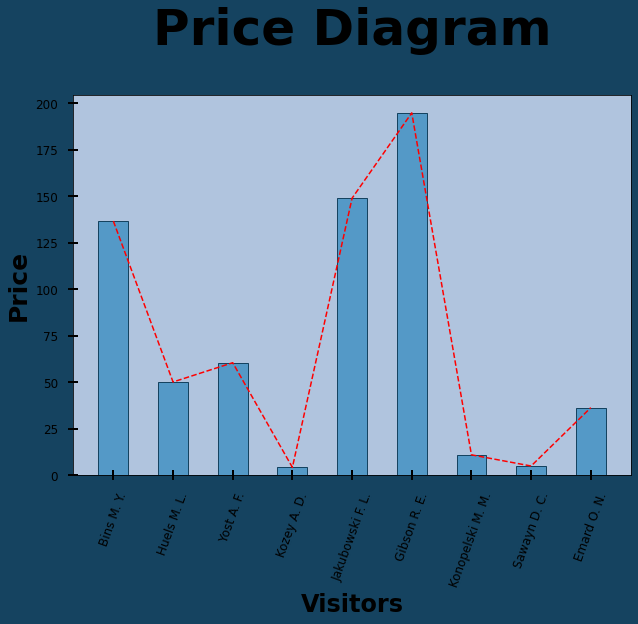

In [669]:
draw_histogram(list(visitor_prices.keys()), list(visitor_prices.values()), "Visitors", "Price", "Price Diagram")

### 2.

In [671]:

serv = {}
for s in services:
    serv[s.s_name] = [k for k in trainings if k.s_id == s.s_id]

def choose1(Service):
    d = {}
    for ss in Service:
        d.setdefault(ss.t_date.month, 0) 
        d[ss.t_date.month]+= ss.t_hours
    for k, v in d.items():
        print(f"Month: {k} - hours: {v}")
  
interact(choose1, Service=serv);

interactive(children=(Dropdown(description='Service', options={'Synthesizing': [t_date=2020-11-02 00:00:00, v_…

### 3.

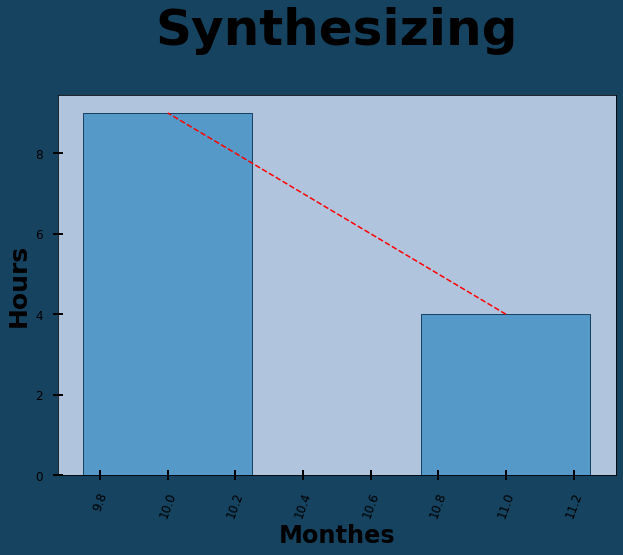

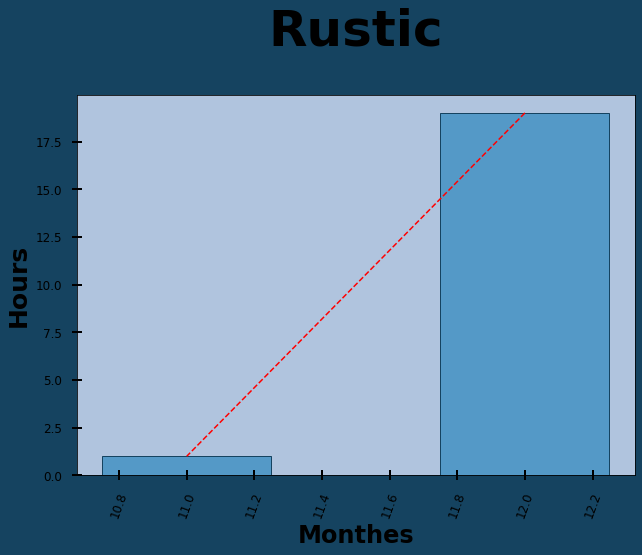

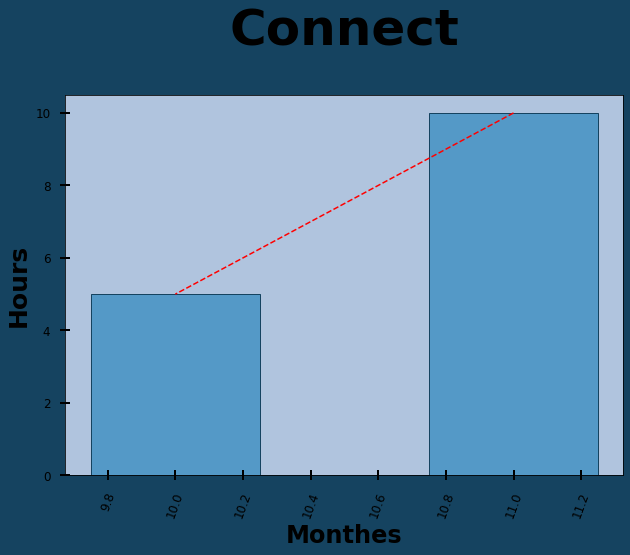

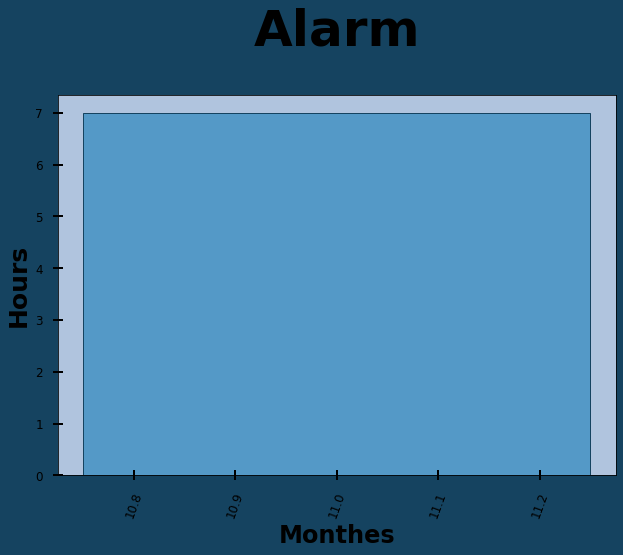

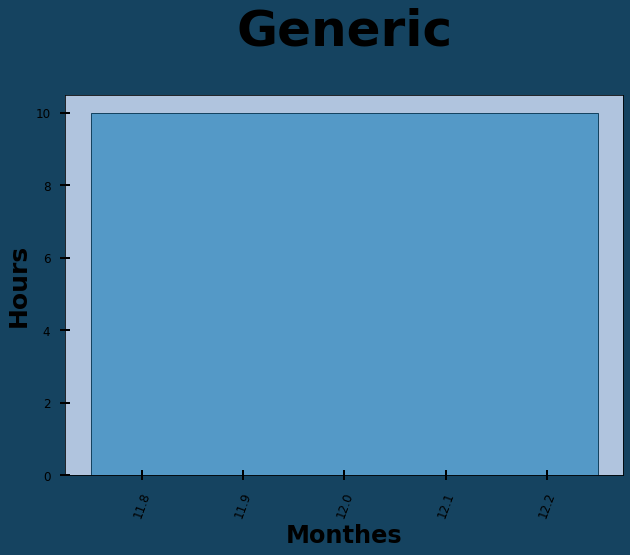

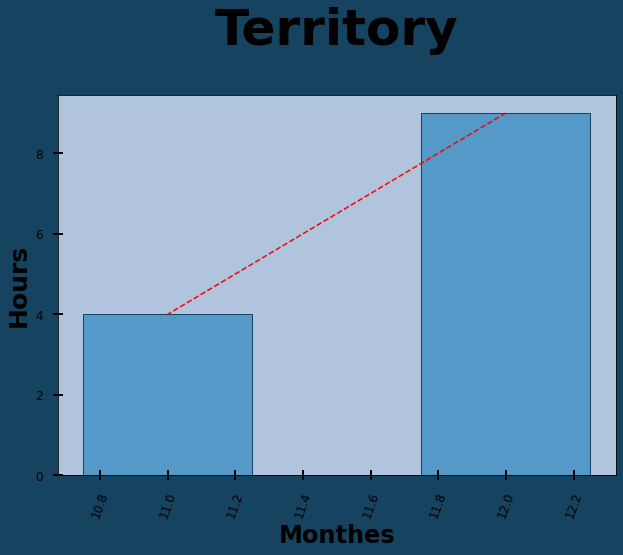

In [672]:
for s, t in serv.items():
    d = {}
    for ss in t:
        d.setdefault(ss.t_date.month, 0) 
        d[ss.t_date.month] += ss.t_hours
    draw_histogram(list(d.keys()), list(d.values()), "Monthes", "Hours", s)
    

## With Pandas

In [673]:
visitors = pd.read_csv("visitors.csv")
services = pd.read_csv("services.csv")
trainings = [pd.read_csv("trainings1.csv"), pd.read_csv("trainings2.csv")]
trainings = pd.concat(trainings, ignore_index=True)

big_df = pd.merge(visitors, trainings, on='v_id', how='left').fillna(0)
big_df = pd.merge(services, big_df, on='s_id', how='left').fillna(0)
cols = ['v_last_name', 'v_name', 'v_father']
big_df['full_name'] = big_df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
big_df = big_df.drop(cols, axis=1)

display(visitors)
display(services)
display(trainings)

display (big_df)

,v_id,v_last_name,v_name,v_father,v_discount
0,1,Bins,Manuela,Yvette,71
1,2,Huels,Matilda,Lauretta,87
2,3,Yost,Arno,Fiona,81
3,4,Kozey,Alejandra,Deborah,69
4,5,Jakubowski,Fidel,Leann,74
5,6,Gibson,Reba,Elena,61
6,7,Konopelski,Mireya,Mia,97
7,8,Sawayn,Dallin,Crawford,86
8,9,Emard,Ofelia,Nicola,75


,s_id,s_price,s_name
0,11,53.98,Synthesizing
1,22,1.52,Rustic
2,33,63.79,Connect
3,44,11.84,Alarm
4,55,56.42,Generic
5,66,36.34,Territory


,t_date,v_id,s_id,t_hours
0,2020-11-02,1,11,4
1,2020-11-05,2,33,6
2,2020-12-08,3,55,5
3,2020-12-08,4,22,9
4,2020-12-29,5,66,8
5,2020-11-05,6,22,1
6,2020-10-10,7,33,5
7,2020-11-05,8,44,3
8,2020-11-09,9,66,4
9,2020-12-08,6,22,8


,s_id,s_price,s_name,v_id,v_discount,t_date,t_hours,full_name
0,11,53.98,Synthesizing,1,71,2020-11-02,4,Bins Manuela Yvette
1,11,53.98,Synthesizing,6,61,2020-10-10,9,Gibson Reba Elena
2,22,1.52,Rustic,2,87,2020-12-23,2,Huels Matilda Lauretta
3,22,1.52,Rustic,4,69,2020-12-08,9,Kozey Alejandra Deborah
4,22,1.52,Rustic,6,61,2020-11-05,1,Gibson Reba Elena
5,22,1.52,Rustic,6,61,2020-12-08,8,Gibson Reba Elena
6,33,63.79,Connect,1,71,2020-11-25,4,Bins Manuela Yvette
7,33,63.79,Connect,2,87,2020-11-05,6,Huels Matilda Lauretta
8,33,63.79,Connect,7,97,2020-10-10,5,Konopelski Mireya Mia
9,44,11.84,Alarm,7,97,2020-11-09,4,Konopelski Mireya Mia


In [674]:
### 4, 5 

In [682]:
full_names = set(big_df["full_name"])

def task4(name, plot=False):
    df1 = big_df.copy()
    df1 = df1[df1.full_name == name]
    df1 = df1.loc[:, ['s_name', 't_hours']]
    if plot:
        pl = df1.sort_values(by='t_hours', ascending=False)
        pl.plot(x='s_name', y='t_hours', kind='bar', title=name, figsize=(10, 5), rot=30, color= '#EB984E');
    display(df1)
    print(f"Total sum: {df1['t_hours'].sum()}" )

interact(task4, name=full_names);

interactive(children=(Dropdown(description='name', options=('Sawayn Dallin Crawford', 'Bins Manuela Yvette', '…

### 6. 

In [678]:
dates = pd.date_range(datetime(2020, 1, 1), datetime(2020, 12, 30), freq='D')

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

def task6(name, p):
    df1 = big_df.copy()
    start_m, end_m = p[0].month, p[1].month
    df1['t_date'] = df1['t_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
    df1 = df1[(df1.full_name == name) & (df1.t_date >= start_m) & (df1.t_date <= end_m)]
    df1 = df1.loc[:, ['t_date', 't_hours']]
    
    df1 = df1.groupby(["t_date"]).sum()
    df1 = df1.reset_index()
    display(df1)
    

interact(task6, name=full_names, p=selection_range_slider);

interactive(children=(Dropdown(description='name', options=('Sawayn Dallin Crawford', 'Bins Manuela Yvette', '…